In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [2]:
# load mnist
(trainX, trainy), (testX, testy) = mnist.load_data()

## What is MNIST?

It is a dataset & task for handwritten digit recognition.

5

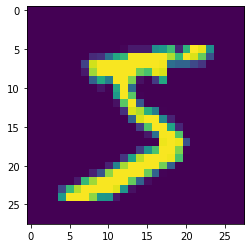

In [5]:
plt.imshow(trainX[0])
trainy[0]

In [6]:
# flatten
trainX = trainX.reshape(trainX.shape[0], -1)
testX = testX.reshape(testX.shape[0], -1)

# norm to 0~1
trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)

trainX /= 255.0
testX /= 255.0


5

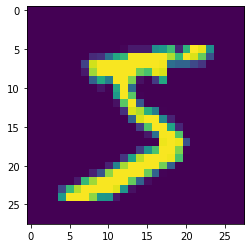

In [9]:
plt.imshow(trainX[0].reshape(28, 28))
trainy[0]

In [4]:
# hyper parameters
learning_rate = 1e-4
training_epochs = 15
batch_size = 100

## First Model

Single Layer Perceptron

In [9]:
def get_first_model(initializer, learning_rate):
    x = keras.layers.Input(shape=(784,))
    hypothesis = keras.layers.Dense(10, kernel_initializer=initializer)(x)
    y = keras.activations.softmax(hypothesis)

    model = keras.models.Model(x, y)

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=["accuracy"])

    return model

### Train

In [10]:
first_model = get_first_model(keras.initializers.GlorotUniform(), learning_rate)
first_hist = first_model.fit(trainX, trainy, batch_size=batch_size, epochs=training_epochs, validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 3s 2ms/step - loss: 2.0765 - accuracy: 0.3223 - val_loss: 1.2521 - val_accuracy: 0.7661
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 1.1578 - accuracy: 0.7667 - val_loss: 0.8392 - val_accuracy: 0.8341
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.8175 - accuracy: 0.8269 - val_loss: 0.6582 - val_accuracy: 0.8615
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.6633 - accuracy: 0.8522 - val_loss: 0.5593 - val_accuracy: 0.8723
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.5784 - accuracy: 0.8643 - val_loss: 0.4965 - val_accuracy: 0.8831
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.5199 - accuracy: 0.8762 - val_loss: 0.4541 - val_accuracy: 0.8893
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.8835 - val_loss: 0.4232 - val_accuracy: 0.8942
Epoch 

In [14]:
def calculate_accuracy(x, y, model):
    hypothesis = model.predict(x)
    hypothesis = np.argmax(hypothesis, axis=-1)

    correct_prediction = hypothesis == y
    accuracy = np.mean(correct_prediction)
    print("accuracy:", accuracy)

In [15]:
def plot_loss_curve(hist):
    plt.plot(hist.history["loss"], label="train loss")
    plt.plot(hist.history["val_loss"], label="val loss")
    plt.legend()

    plt.figure()
    plt.plot(hist.history["accuracy"], label="train acc")
    plt.plot(hist.history["val_accuracy"], label="val acc")
    plt.legend();

### Evaluate prediction

accuracy: 0.913


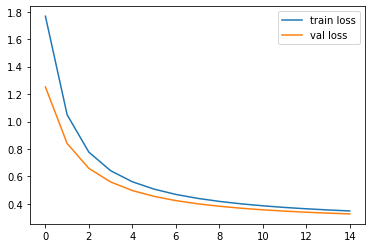

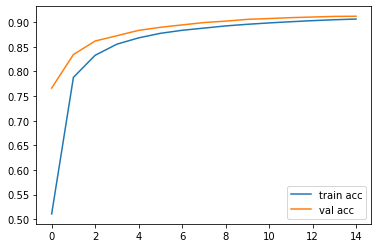

In [16]:
calculate_accuracy(testX, testy, first_model)
plot_loss_curve(first_hist)

## Second Model

Deeper (3 hidden layer) neural network with Xavier initialization

In [17]:
def get_second_model(initializer, learning_rate):
    x = keras.layers.Input(shape=(784,))
    h1 = keras.layers.Dense(256, kernel_initializer=initializer, activation="relu")(x)
    h2 = keras.layers.Dense(256, kernel_initializer=initializer, activation="relu")(h1)
    h3 = keras.layers.Dense(256, kernel_initializer=initializer, activation="relu")(h2)
    hypothesis = keras.layers.Dense(10, kernel_initializer=initializer)(h3)
    y = keras.activations.softmax(hypothesis)

    model = keras.models.Model(x, y)

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=["accuracy"])

    return model

In [18]:
second_model = get_second_model(keras.initializers.GlorotUniform(), learning_rate)
second_hist = second_model.fit(trainX, trainy, batch_size=batch_size, epochs=training_epochs, validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 2s 3ms/step - loss: 1.1926 - accuracy: 0.6843 - val_loss: 0.2559 - val_accuracy: 0.9259
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.2452 - accuracy: 0.9293 - val_loss: 0.1885 - val_accuracy: 0.9472
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1816 - accuracy: 0.9475 - val_loss: 0.1575 - val_accuracy: 0.9551
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1446 - accuracy: 0.9585 - val_loss: 0.1343 - val_accuracy: 0.9603
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9661 - val_loss: 0.1248 - val_accuracy: 0.9639
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9719 - val_loss: 0.1163 - val_accuracy: 0.9641
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9755 - val_loss: 0.1051 - val_accuracy: 0.9692
Epoch 

accuracy: 0.9765


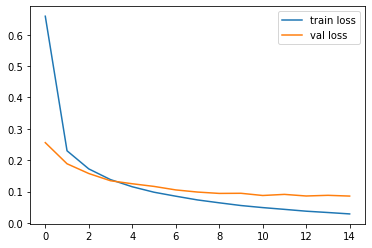

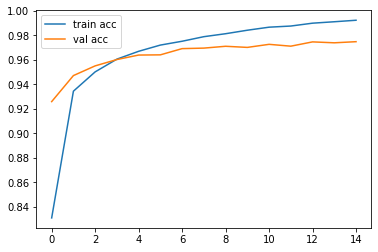

In [19]:
calculate_accuracy(testX, testy, second_model)
plot_loss_curve(second_hist)

## Third model

2nd Model + Dropout

In [20]:
def get_third_model(initializer, learning_rate):
    x = keras.layers.Input(shape=(784,))
    h1 = keras.layers.Dense(256, kernel_initializer=initializer, activation="relu")(x)
    d1 = keras.layers.Dropout(0.1)(h1)
    h2 = keras.layers.Dense(256, kernel_initializer=initializer, activation="relu")(d1)
    d2 = keras.layers.Dropout(0.1)(h2)
    h3 = keras.layers.Dense(256, kernel_initializer=initializer, activation="relu")(d2)
    d3 = keras.layers.Dropout(0.1)(h3)
    hypothesis = keras.layers.Dense(10, kernel_initializer=initializer)(d3)
    y = keras.activations.softmax(hypothesis)

    model = keras.models.Model(x, y)

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=["accuracy"])

    return model

In [21]:
third_model = get_third_model(keras.initializers.GlorotUniform(), learning_rate)
third_hist = third_model.fit(trainX, trainy, batch_size=batch_size, epochs=training_epochs, validation_split=0.2)

Epoch 1/15
480/480 [==============================] - 2s 3ms/step - loss: 1.2679 - accuracy: 0.6385 - val_loss: 0.2706 - val_accuracy: 0.9198
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.9053 - val_loss: 0.2002 - val_accuracy: 0.9410
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.2264 - accuracy: 0.9343 - val_loss: 0.1601 - val_accuracy: 0.9535
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.9450 - val_loss: 0.1400 - val_accuracy: 0.9602
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1510 - accuracy: 0.9554 - val_loss: 0.1220 - val_accuracy: 0.9640
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9626 - val_loss: 0.1114 - val_accuracy: 0.9687
Epoch 7/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9664 - val_loss: 0.1031 - val_accuracy: 0.9690
Epoch 

accuracy: 0.9778


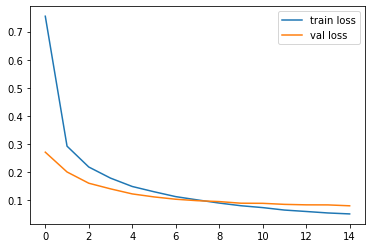

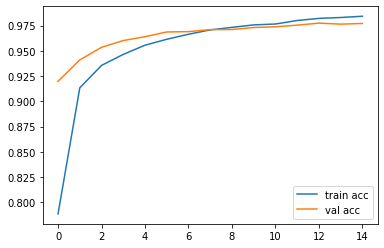

In [22]:
calculate_accuracy(testX, testy, third_model)
plot_loss_curve(third_hist)